In [135]:
#******************************
# code help from Andrew Russel
#******************************
!wget https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
import scipy.io
mat = scipy.io.loadmat('mnist.mat')

--2019-10-13 14:25:20--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2019-10-13 14:25:20--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14278089 (14M) [application/octet-stream]
Saving to: ‘mnist.mat.2’

mnist.mat.2         100%[===================>]  13.62M  --.-KB/s    in 0.1s    

2019-10-13 14:25:21 (134 MB/s) - ‘mnist.mat.2’ saved [14278089/14278089]



In [0]:
import numpy as np
import matplotlib.pyplot as plt

trainX = np.array(mat["trainX"], dtype=float)
testX = np.array(mat["testX"], dtype=float)

trainy = mat["trainY"]
testy = mat["testY"]

In [0]:
def euclidean_distance(x, y):
  return np.sqrt(np.sum(np.power(x-y, 2)))

def cosine_distance(x, y):
  return np.dot(x,y) / (np.sqrt(np.dot(x,x)) * np.sqrt(np.dot(y,y)))


conmat = np.zeros((10, 10))

tsize = 200
# arrays for plotting
x, ey, cy, edistances, cdistances = [], [], [], [], []

# grab every 150th point
for i in range(150, 5001, 150):
  ec, cc = 0, 0
  # 
  for tstx in range(tsize):
    edistances, cdistances = [], []
    for trnx in range(i):
      edistances.append( euclidean_distance( trainX[trnx, :], testX[tstx, :] ) )
      cdistances.append( cosine_distance( trainX[trnx,:], testX[tstx,:] ) )
     
    edistances = np.array(edistances)
    cdistances = np.array(cdistances)
    
    if(trainy[0, np.argmin(edistances)] == testy[0, tstx]):
      ec += 1
    else:
      conmat[trainy[0, np.argmin(edistances)], testy[0, tstx]] += 1
      
      
    if(trainy[0, np.argmax(cdistances)] == testy[0, tstx]):
      cc += 1
  # populate plot arrays
  x.append(i)
  ey.append(ec/tsize)
  cy.append(cc/tsize)
c =conmat

Text(0, 0.5, 'Probability of Misclassification')

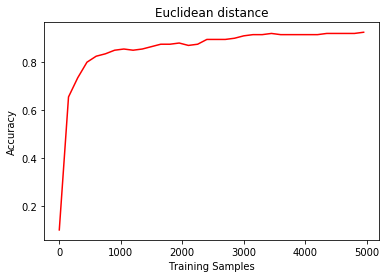

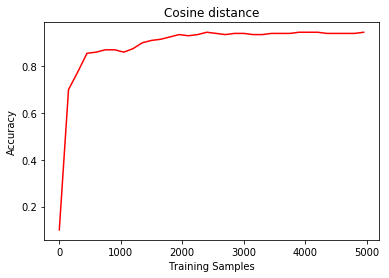

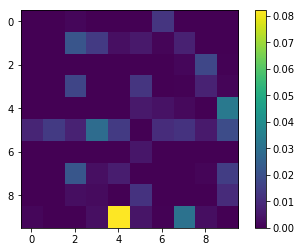

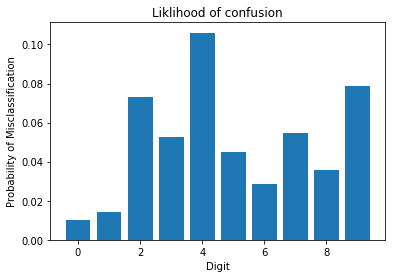

In [150]:
plt.figure()
plt.plot(x, ey, '-r')
plt.title('Euclidean distance')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.figure()
plt.plot(x, cy, '-r')
plt.title('Cosine distance')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')

conmat = c / tsize / 10
plt.figure()
plt.imshow(conmat)
plt.colorbar()

histy = conmat.sum(axis=0)
histx = np.arange(10)
fig, ax = plt.subplots(1, 1)
plt.bar(histx, histy)
plt.title('Liklihood of confusion')
plt.xlabel('Digit')
plt.ylabel('Probability of Misclassification')